In [1]:
import requests
import pandas as pd
from datetime import datetime
import os
import gzip
import shutil
import pandas as pd
from sklearn.impute import KNNImputer
from datetime import datetime
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, trim
import requests
import pandas as pd
from datetime import datetime
from pyspark.sql.functions import col, count, when, isnan
from datetime import timedelta
from pyspark.sql import Window
from pyspark.sql.functions import last

In [2]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

    Importing Libraries: The code starts by importing necessary libraries:
        requests for making HTTP requests to the FMP API.
        pandas for data manipulation and analysis.
        datetime for handling dates and times.

    API Key and Stock Symbol:
        An API key for FMP is defined. This key is essential for authentication and accessing the data from FMP.
        The stock symbol ^STOXX50E for the EURO STOXX 50 index is specified.

    Building the API Request URL:
        The URL for the FMP API is constructed using string formatting. It includes the stock symbol, a date range (from February 1, 2005, to the current date), and the API key.

    Making the API Request:
        A GET request is made to the constructed URL using the requests library.
        The response is checked for a successful status code (200). If the request is successful, the data is processed; if not, an error message is displayed.

    Data Processing:
        The successful response is converted from JSON format to a Python dictionary.
        The code checks for the presence of the 'historical' key in the data, which contains the required historical stock price data.
        This historical data is then converted into a pandas DataFrame for easier manipulation and analysis.

    Filtering and Displaying Data:
        The DataFrame is filtered to include only the 'date' and 'close' columns, representing the closing prices of the stock on each date.
        Finally, the filtered DataFrame is displayed.

In [3]:
import requests
import pandas as pd
from datetime import datetime

# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP historical data endpoint
url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{stock_symbol}?from=2005-01-04&to={datetime.now().strftime("%Y-%m-%d")}&apikey={api_key}'

# FMP API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    data = response.json()

    # Extract the historical data
    if 'historical' in data:
        historical_data = data['historical']

        # Convert to a pandas DataFrame
        index_df = pd.DataFrame(historical_data)

        # Filter the DataFrame to only include the 'Close' column
        index_df = index_df[['date', 'close']]

        # Display the DataFrame
        print(index_df)
    else:
        print("No 'historical' data found in the response.")
else:
    print(f'Failed to retrieve data: {response.status_code}')

            date        close
0     2024-01-26  4635.470220
1     2024-01-25  4582.259770
2     2024-01-24  4564.109860
3     2024-01-23  4465.910160
4     2024-01-22  4480.319820
...          ...          ...
4816  2005-01-10  2977.209961
4817  2005-01-07  2979.810059
4818  2005-01-06  2966.239990
4819  2005-01-05  2947.189941
4820  2005-01-04  2971.120117

[4821 rows x 2 columns]


## Technical Indicators

In [4]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP SMA technical indicator endpoint with daily data
sma_period = 50
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/daily/{stock_symbol}?period={sma_period}&type=sma&apikey={api_key}'

# FMP API request for SMA data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    sma_data = response.json()

    # Convert to a pandas DataFrame
    sma_df = pd.DataFrame(sma_data)

    # Ensure 'date' column is in datetime format
    sma_df['date'] = pd.to_datetime(sma_df['date'])

    # Format the 'date' column to display dates only
    sma_df['date'] = sma_df['date'].dt.strftime('%Y-%m-%d')

    # Filter the DataFrame for rows where the date is after February 1, 2005
    sma_df = sma_df[sma_df['date'] >= '2005-01-04']

    # Keep only the 'date' and 'sma' columns
    sma_df = sma_df[['date', 'sma']]

    # Display the DataFrame
    print(sma_df)
else:
    print(f'Failed to retrieve SMA data: {response.status_code}')

            date          sma
0     2024-01-26  4460.275762
1     2024-01-25  4453.400762
2     2024-01-24  4446.399365
3     2024-01-23  4439.064365
4     2024-01-22  4434.330166
...          ...          ...
1268  2019-02-04  3099.323989
1269  2019-02-01  3099.634790
1270  2019-01-31  3100.018589
1271  2019-01-30  3100.937192
1272  2019-01-29  3102.198794

[1273 rows x 2 columns]


In [5]:
# FMP API key
api_key = '47461a32a9bcf3b0a6c2c6e98ccfab42'

# Symbol for EURO STOXX 50
stock_symbol = '^STOXX50E'

# URL for the FMP EMA technical indicator endpoint with daily data
ema_period = 50
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/daily/{stock_symbol}?period={ema_period}&type=ema&apikey={api_key}'

# FMP API request for EMA data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    ema_data = response.json()

    # Convert to a pandas DataFrame
    ema_df = pd.DataFrame(ema_data)

    # Ensure 'date' column is in datetime format
    ema_df['date'] = pd.to_datetime(ema_df['date'])

    # Format the 'date' column to display dates only
    ema_df['date'] = ema_df['date'].dt.strftime('%Y-%m-%d')

    # Filter the DataFrame for rows where the date is after February 1, 2005
    ema_df = ema_df[ema_df['date'] >= '2005-01-04']

    # Keep only the 'date' and 'ema' columns
    ema_df = ema_df[['date', 'ema']]

    # Display the DataFrame
    print(ema_df)
else:
    print(f'Failed to retrieve EMA data: {response.status_code}')


            date          ema
0     2024-01-26  4440.930772
1     2024-01-25  4432.990386
2     2024-01-24  4426.897758
3     2024-01-23  4421.297264
4     2024-01-22  4419.476330
...          ...          ...
1268  2019-02-04  3116.284273
1269  2019-02-01  3114.287714
1270  2019-01-31  3111.968024
1271  2019-01-30  3110.030804
1272  2019-01-29  3107.920225

[1273 rows x 2 columns]


# Index + Technical Indicator 

In [6]:
# Merge index_df and sma_df on 'date'
merged_df = pd.merge(index_df, sma_df, on='date', how='left')

# Merge the result with ema_df on 'date'
index_data = pd.merge(merged_df, ema_df, on='date', how='left')

# Rename the columns appropriately
index_data.columns = ['Date', 'Close', 'SMA', 'EMA']

# Display the DataFrame
print(index_data)

            Date        Close          SMA          EMA
0     2024-01-26  4635.470220  4460.275762  4440.930772
1     2024-01-25  4582.259770  4453.400762  4432.990386
2     2024-01-24  4564.109860  4446.399365  4426.897758
3     2024-01-23  4465.910160  4439.064365  4421.297264
4     2024-01-22  4480.319820  4434.330166  4419.476330
...          ...          ...          ...          ...
4816  2005-01-10  2977.209961          NaN          NaN
4817  2005-01-07  2979.810059          NaN          NaN
4818  2005-01-06  2966.239990          NaN          NaN
4819  2005-01-05  2947.189941          NaN          NaN
4820  2005-01-04  2971.120117          NaN          NaN

[4821 rows x 4 columns]


## Removed SMA & EMA (API Problem Historic Data). Might back it when the API is ready again

In [7]:
index_data.describe()

,Close,SMA,EMA
count,4821.000000,1273.000000,1273.000000
mean,3320.749657,3746.447524,3747.809363
std,590.015261,410.625169,403.284757
min,1809.979981,2787.037207,2937.739941
25%,2906.350098,3422.549185,3413.340058
50%,3318.200000,3710.687993,3715.162851
75%,3704.850098,4155.662373,4148.034393
max,4635.470220,4460.275762,4440.930772


# Interest Rate API (Eurostat)

In [8]:
# Dataset code
dataset_code = "ei_mfir_m"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [9]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'ei_mfir_m.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 's_adj', 'p_adj', 'indic', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['indic'] == 'MF-3MI-RT')
]

# Drop unnecessary columns
structured_data.drop(['freq', 's_adj', 'p_adj'], axis=1, inplace=True)

# Filter for date range (from October 1, 2004, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2005-01-04 ']
structured_data = structured_data[['indic','geo'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [10]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[5:]  
data_for_melting = structured_data[['geo'] + list(date_columns)]

# Melt the DataFrame to change its structure
structured_data = pd.melt(data_for_melting, id_vars=['geo'], var_name='Period', value_name='Interest')

# Filter for 'geo' == 'EA'
Interest_data_ea = structured_data[structured_data['geo'] == 'EA']

# Apply forward filling
Interest_data_ea.loc[:, 'Interest'] = Interest_data_ea['Interest'].ffill()

# Rearrange the columns
Interest_data_ea = Interest_data_ea[['Period', 'geo', 'Interest']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(Interest_data_ea.head(10))


       Period geo  Interest
3    2005-05   EA  2.12560 
16   2005-06   EA  2.11100 
29   2005-07   EA  2.11940 
42   2005-08   EA  2.13250 
55   2005-09   EA  2.13910 
68   2005-10   EA  2.19660 
81   2005-11   EA  2.36090 
94   2005-12   EA  2.47290 
107  2006-01   EA  2.51170 
120  2006-02   EA  2.60040 


In [11]:
# Convert 'Period' to datetime
Interest_data_ea['Period'] = pd.to_datetime(Interest_data_ea['Period'])

# Set 'Period' as the index
Interest_data_ea.set_index('Period', inplace=True)

# Create a daily date range that covers the entire period in your data
start_date = Interest_data_ea.index.min()
end_date = Interest_data_ea.index.max()
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex the DataFrame to this date range, forward filling the missing values
daily_interest_data = Interest_data_ea.reindex(all_days).ffill()

# Reset the index so 'Period' becomes a column again
daily_interest_data.reset_index(inplace=True)
daily_interest_data.rename(columns={'index': 'Period'}, inplace=True)

# Display the first 10 rows of the daily data
print(daily_interest_data.head(10))

      Period geo  Interest
0 2005-05-01  EA  2.12560 
1 2005-05-02  EA  2.12560 
2 2005-05-03  EA  2.12560 
3 2005-05-04  EA  2.12560 
4 2005-05-05  EA  2.12560 
5 2005-05-06  EA  2.12560 
6 2005-05-07  EA  2.12560 
7 2005-05-08  EA  2.12560 
8 2005-05-09  EA  2.12560 
9 2005-05-10  EA  2.12560 


In [12]:
# Check if 'Period' is in the columns; if not, the index might already be the 'Period'
if 'Period' in Interest_data_ea.columns:
    Interest_data_ea['Period'] = pd.to_datetime(Interest_data_ea['Period'])
    Interest_data_ea.set_index('Period', inplace=True)
elif not isinstance(Interest_data_ea.index, pd.DatetimeIndex):
    # If the index is not a datetime, convert it
    Interest_data_ea.index = pd.to_datetime(Interest_data_ea.index)

# Create a daily date range
start_date = Interest_data_ea.index.min()
end_date = Interest_data_ea.index.max()
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex to create a DataFrame with all days, introducing NaNs for days without data
interest_data = Interest_data_ea.reindex(all_days)

# Convert the index to a numerical value for KNN
interest_data['Day_Ordinal'] = interest_data.index.map(datetime.toordinal)

# Extract the 'Interest' column for imputation
knn_data = interest_data[['Day_Ordinal', 'Interest']].values

# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
knn_data_imputed = knn_imputer.fit_transform(knn_data)

# Put the imputed 'Interest' data back into the DataFrame
interest_data['Interest'] = knn_data_imputed[:, 1]

# Drop the 'Day_Ordinal' column as it's no longer needed
interest_data.drop('Day_Ordinal', axis=1, inplace=True)

# Reset index to make 'Period' a column again
interest_data.reset_index(inplace=True)
interest_data.rename(columns={'index': 'Period'}, inplace=True)

# If the 'geo' column is required, fill it with a constant value (e.g., 'EA')
interest_data['geo'] = 'EA'

# Display the first 10 rows of the daily data
print(interest_data.head(10))

      Period geo  Interest
0 2005-05-01  EA   2.12560
1 2005-05-02  EA   2.12552
2 2005-05-03  EA   2.12552
3 2005-05-04  EA   2.12552
4 2005-05-05  EA   2.12552
5 2005-05-06  EA   2.12552
6 2005-05-07  EA   2.12552
7 2005-05-08  EA   2.12552
8 2005-05-09  EA   2.12552
9 2005-05-10  EA   2.12552


# Bonds Yields API (Eurostat)

In [13]:
# Dataset code
dataset_code = "irt_euryld_d"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [14]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'irt_euryld_d.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'yld_curv', 'maturity', 'bonds', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['yld_curv'] == 'SPOT_RT') & 
    (structured_data['bonds'] == 'CGB_EA')
]

# Drop unnecessary columns
structured_data.drop(['freq', 'geo'], axis=1, inplace=True)

# Filter for date range (from October 1, 2004, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2005-01-04 ']
structured_data = structured_data[['yld_curv', 'maturity', 'bonds'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [15]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[3:]  # Assuming date columns start from the 4th column
data_for_melting = structured_data[['maturity'] + list(date_columns)]

# Melt the DataFrame to change its structure
bonds_data = pd.melt(data_for_melting, id_vars=['maturity'], var_name='Period', value_name='Rate')

# Specify the desired maturities (M1 to M12 and Y1 to Y30)
desired_maturities = [f'M{i}' for i in range(1, 3)] + [f'Y{i}' for i in range(1, 10)]

# Filter the DataFrame to include only the specified maturities
bonds_data = bonds_data[bonds_data['maturity'].isin(desired_maturities)]

# Rearrange the columns
bonds_data = bonds_data[['Period', 'maturity', 'Rate']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(bonds_data.head())


          Period maturity     Rate
9    2005-01-04        Y1  2.23056
141  2005-01-04        Y2  2.46487
273  2005-01-04        Y3  2.67994
286  2005-01-04        Y4  2.87586
298  2005-01-04        Y5  3.05325


# Inflation Rate API (Eurostat)

In [16]:
# Dataset code
dataset_code = "prc_hicp_manr"

# API URL for downloading the dataset
api_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_code}?format=TSV&compressed=true"

# Download the dataset
response = requests.get(api_url, stream=True)
output_file = dataset_code + ".tsv.gz"

if response.status_code == 200:
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Error downloading dataset. Status code: {response.status_code}")

# Unzipping the dataset
with gzip.open(output_file, 'rb') as f_in:
    with open(dataset_code + ".tsv", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Dataset unzipped successfully.")

Dataset downloaded successfully.
Dataset unzipped successfully.


In [17]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Construct the file path dynamically
file_name = 'prc_hicp_manr.tsv'  # File Name
file_path = os.path.join(current_directory, file_name)

# Load the dataset
data = pd.read_csv(file_path, sep='\t')

# Split the first column into separate columns
split_columns = data.iloc[:, 0].str.split(',', expand=True)
split_columns.columns = ['freq', 'unit', 'coicop', 'geo']

# Combine the split columns with the original data (excluding the first column)
structured_data = pd.concat([split_columns, data.iloc[:, 1:]], axis=1)

# Apply filters
structured_data = structured_data[
    (structured_data['unit'] == 'RCH_A') & 
    (structured_data['coicop'] == 'CP00')
]

# Drop unnecessary columns
structured_data.drop(['freq'], axis=1, inplace=True)

# Filter for date range (from January 1, 2005, onwards)
date_columns = structured_data.columns[3:]
dates_from_oct_2004 = date_columns[date_columns >= '2005-01-04 ']
structured_data = structured_data[['unit', 'coicop', 'geo'] + list(dates_from_oct_2004)]

# Reset the index for a clean table
structured_data.reset_index(drop=True, inplace=True)

# Display the structured DataFrame
pd.set_option('display.max_columns', None)

Current Working Directory: /home/fabiopoli/Desktop


In [18]:
# Filter out only the columns with date values for melting
date_columns = structured_data.columns[5:]  # Assuming date columns start from the 6th column
data_for_melting = structured_data[['geo'] + list(date_columns)]

# Melt the DataFrame to change its structure
inflation_data = pd.melt(data_for_melting, id_vars=['geo'], var_name='Period', value_name='Inflation')

# Filter for 'geo' == 'EA'
inflation_data_ea = inflation_data[inflation_data['geo'] == 'EA']

# Apply forward filling
inflation_data_ea.loc[:, 'Inflation'] = inflation_data_ea['Inflation'].ffill()

# Rearrange the columns
inflation_data_ea = inflation_data_ea[['Period', 'geo', 'Inflation']]

# Display the transformed DataFrame
pd.set_option('display.max_rows', None)  # This option displays all the rows
print(inflation_data_ea.head(10))

       Period geo Inflation
9    2005-04   EA      2.1 
54   2005-05   EA      2.0 
99   2005-06   EA      2.0 
144  2005-07   EA      2.1 
189  2005-08   EA      2.2 
234  2005-09   EA      2.6 
279  2005-10   EA      2.5 
324  2005-11   EA      2.3 
369  2005-12   EA      2.3 
414  2006-01   EA      2.4 


In [19]:
# Convert 'Period' to datetime
inflation_data_ea['Period'] = pd.to_datetime(inflation_data_ea['Period'])

# Set 'Period' as the DataFrame index
inflation_data_ea.set_index('Period', inplace=True)

# Resample to daily data using forward fill
daily_data_ffill = inflation_data_ea.resample('D').ffill()

# Reset index to move 'Period' back to a column
daily_data_ffill.reset_index(inplace=True)

# Display the first 10 rows of the daily data
print(daily_data_ffill.head(10))

      Period geo Inflation
0 2005-04-01  EA      2.1 
1 2005-04-02  EA      2.1 
2 2005-04-03  EA      2.1 
3 2005-04-04  EA      2.1 
4 2005-04-05  EA      2.1 
5 2005-04-06  EA      2.1 
6 2005-04-07  EA      2.1 
7 2005-04-08  EA      2.1 
8 2005-04-09  EA      2.1 
9 2005-04-10  EA      2.1 


In [20]:
# Check if 'Period' is in the columns; if not, the index should already be the 'Period'
if 'Period' in inflation_data_ea.columns:
    inflation_data_ea['Period'] = pd.to_datetime(inflation_data_ea['Period'])
    inflation_data_ea.set_index('Period', inplace=True)
elif not isinstance(inflation_data_ea.index, pd.DatetimeIndex):
    # If the index is not a datetime, convert it
    inflation_data_ea.index = pd.to_datetime(inflation_data_ea.index)

# Convert non-numeric values to NaN in the 'Inflation' column
inflation_data_ea['Inflation'] = pd.to_numeric(inflation_data_ea['Inflation'], errors='coerce')

# Create a daily date range that covers the entire period of your data
date_range = pd.date_range(start=inflation_data_ea.index.min(), end=inflation_data_ea.index.max(), freq='D')

# Create a new DataFrame for KNN imputation
inflation_data = pd.DataFrame(date_range, columns=['Period'])

# Merge with your existing data - this will introduce NaNs for days without data
inflation_data = inflation_data.merge(inflation_data_ea, how='left', left_on='Period', right_index=True)

# Convert 'Period' to a numerical value (e.g., days since start)
min_date = inflation_data['Period'].min()
inflation_data['Day_Ordinal'] = (inflation_data['Period'] - min_date).dt.days

# Prepare data for KNN imputation
knn_data = inflation_data[['Day_Ordinal', 'Inflation']]

# Initialize KNN Imputer - 5 neighbors / Week
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
knn_data_imputed = knn_imputer.fit_transform(knn_data)

# Add imputed data back to DataFrame
inflation_data['Inflation'] = knn_data_imputed[:, 1]

# Fill 'geo' column with 'EA'
inflation_data['geo'] = 'EA'

# Convert 'Day_Ordinal' back to datetime
inflation_data['Period'] = inflation_data['Day_Ordinal'].apply(lambda x: min_date + timedelta(days=x))

# Drop the 'Day_Ordinal' column
inflation_data.drop(columns='Day_Ordinal', inplace=True)

# Display the first 10 rows of the daily data
print(inflation_data.head(10))

      Period geo  Inflation
0 2005-04-01  EA       2.10
1 2005-04-02  EA       2.08
2 2005-04-03  EA       2.08
3 2005-04-04  EA       2.08
4 2005-04-05  EA       2.08
5 2005-04-06  EA       2.08
6 2005-04-07  EA       2.08
7 2005-04-08  EA       2.08
8 2005-04-09  EA       2.08
9 2005-04-10  EA       2.08


# SparkSQL: Tables Connection

In [21]:
# Create a Spark session
spark = SparkSession.builder \
    .appName("Stock Market Trends Analysis") \
    .getOrCreate()

# Function to format date columns in Pandas DataFrame
def format_date_columns(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column]).dt.date
    return df

# Format date columns
index_data = format_date_columns(index_data, 'Date')
interest_data = format_date_columns(interest_data, 'Period')
bonds_data = format_date_columns(bonds_data, 'Period')
inflation_data = format_date_columns(inflation_data, 'Period')

# Convert the Pandas DataFrames to Spark DataFrames
index_df = spark.createDataFrame(index_data)
interest_df = spark.createDataFrame(interest_data)
bonds_df = spark.createDataFrame(bonds_data)
inflation_df = spark.createDataFrame(inflation_data)

# Trim and convert date columns to DateType
index_df = index_df.withColumn("date", to_date(trim(col("date")), "yyyy-MM-dd"))
interest_df = interest_df.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))
bonds_df = bonds_df.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))
inflation_df = inflation_df.withColumn("Period", to_date(trim(col("Period")), "yyyy-MM-dd"))

# Create Temporary Views
index_df.createOrReplaceTempView("indexView")
interest_df.createOrReplaceTempView("interestView")
bonds_df.createOrReplaceTempView("bondsView")
inflation_df.createOrReplaceTempView("inflationView")

# SQL Query for Joining
join_query = """
SELECT i.Date, i.Close,
       int.Interest as InterestRate, 
       b.Rate as BondRate, b.maturity as BondMaturity, 
       inf.Inflation as InflationRate
FROM indexView i
LEFT JOIN interestView int ON i.date = int.Period
LEFT JOIN bondsView b ON i.date = b.Period
LEFT JOIN inflationView inf ON i.date = inf.Period
"""

# Execute the query
dataset = spark.sql(join_query)

# Show the result
dataset.show(10)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/28 13:08:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/01/28 13:08:14 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


+----------+------------+------------+--------+------------+-------------+
|      Date|       Close|InterestRate|BondRate|BondMaturity|InflationRate|
+----------+------------+------------+--------+------------+-------------+
|2011-11-07|2275.9199219|     1.44908| 4.22438|          Y9|          2.9|
|2011-11-07|2275.9199219|     1.44908|  4.0418|          Y8|          2.9|
|2011-11-07|2275.9199219|     1.44908|  3.8268|          Y7|          2.9|
|2011-11-07|2275.9199219|     1.44908| 3.58059|          Y6|          2.9|
|2011-11-07|2275.9199219|     1.44908| 3.31555|          Y5|          2.9|
|2011-11-07|2275.9199219|     1.44908| 3.06482|          Y4|          2.9|
|2011-11-07|2275.9199219|     1.44908| 2.88702|          Y3|          2.9|
|2011-11-07|2275.9199219|     1.44908| 2.82555|          Y2|          2.9|
|2011-11-07|2275.9199219|     1.44908| 2.66905|          Y1|          2.9|
|2011-11-08|2303.1999512|     1.44908| 4.27574|          Y9|          2.9|
+----------+------------+

In [22]:
# DataFrame: joined_df
numeric_column_types = ['int', 'double', 'float', 'long']

# Counting zeros and nulls for each column
for column in dataset.columns:
    # Check if the column is numeric
    if str(dataset.schema[column].dataType) in numeric_column_types:
        zero_count = dataset.filter(col(column) == 0).count()
        null_or_nan_count = joined_df.filter(col(column).isNull() | isnan(col(column))).count()
    else:
        zero_count = 'N/A' # Not applicable for non-numeric columns
        null_or_nan_count = dataset.filter(col(column).isNull()).count() # Check only for nulls in non-numeric columns

    print(f"Column '{column}': Zeros = {zero_count}, Nulls or NaNs = {null_or_nan_count}")

Column 'Date': Zeros = N/A, Nulls or NaNs = 0


Column 'Close': Zeros = N/A, Nulls or NaNs = 0
Column 'InterestRate': Zeros = N/A, Nulls or NaNs = 1039
Column 'BondRate': Zeros = N/A, Nulls or NaNs = 17


Column 'BondMaturity': Zeros = N/A, Nulls or NaNs = 17
Column 'InflationRate': Zeros = N/A, Nulls or NaNs = 850


In [23]:
# Print the schema of the DataFrame
dataset.printSchema()

# Count the number of rows in the DataFrame
print("Number of rows:", dataset.count())

# Show statistical summaries of the DataFrame
dataset.describe().show()

root
 |-- Date: date (nullable = true)
 |-- Close: double (nullable = true)
 |-- InterestRate: double (nullable = true)
 |-- BondRate: string (nullable = true)
 |-- BondMaturity: string (nullable = true)
 |-- InflationRate: double (nullable = true)



Number of rows: 43253


24/01/28 13:08:29 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------------+------------------+------------------+------------+------------------+
|summary|            Close|      InterestRate|          BondRate|BondMaturity|     InflationRate|
+-------+-----------------+------------------+------------------+------------+------------------+
|  count|            43253|             42214|             43236|       43236|             42403|
|   mean|3318.646819127138|1.0382766996730297|1.7523394509205183|        NULL|2.1311944909559886|
| stddev|589.1194445729791|1.6532667543552593|1.5965558809762403|        NULL| 2.070905367252891|
|    min|     1809.9799805|            -0.582|          -0.00122|          Y1|              -0.6|
|    max|       4635.47022|            5.1131|            9.7E-4|          Y9|              10.1|
+-------+-----------------+------------------+------------------+------------+------------------+



In [24]:
# Count the total number of rows
total_rows = dataset.count()

# Count rows where specific columns are available but others are missing (Null or NaN)
# Adjust column names as per your DataFrame
missing_columns_count = dataset.filter(
    (col("InterestRate").isNull() | isnan(col("InterestRate"))) &
    (col("BondRate").isNull() | isnan(col("BondRate"))) &
    (col("InflationRate").isNull() | isnan(col("InflationRate"))) &
    col("Close").isNotNull()
).count()

# Calculate the percentage of such instances
percentage_missing_columns = (missing_columns_count / total_rows) * 100

print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing 'InterestRate', 'BondRate', and 'InflationRate': {missing_columns_count}")
print(f"Percentage of Rows with missing rates: {percentage_missing_columns:.2f}%")

# Filter the DataFrame to get rows with missing 'InterestRate', 'BondRate', and 'InflationRate' but available 'Open'
missing_values_table = dataset.filter(
    (col("InterestRate").isNull() | isnan(col("InterestRate"))) &
    (col("BondRate").isNull() | isnan(col("BondRate"))) &
    (col("InflationRate").isNull() | isnan(col("InflationRate"))) &
    col("Close").isNotNull()
)

# Show the rows with missing values
missing_values_table.show()


Total Rows: 43253
Rows with 'Open' but missing 'InterestRate', 'BondRate', and 'InflationRate': 4
Percentage of Rows with missing rates: 0.01%
+----------+----------+------------+--------+------------+-------------+
|      Date|     Close|InterestRate|BondRate|BondMaturity|InflationRate|
+----------+----------+------------+--------+------------+-------------+
|2023-12-29| 4521.6499|        NULL|    NULL|        NULL|         NULL|
|2024-01-26|4635.47022|        NULL|    NULL|        NULL|         NULL|
|2023-12-22|4521.47021|        NULL|    NULL|        NULL|         NULL|
|2024-01-25|4582.25977|        NULL|    NULL|        NULL|         NULL|
+----------+----------+------------+--------+------------+-------------+



In [25]:
# Count the total number of rows
total_rows = dataset.count()

# Count rows where any one of the specific columns is available but others are missing (Null or NaN)
# Adjust column names as per your DataFrame
missing_any_column_count = dataset.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

# Filter the DataFrame to get rows with missing any one of 'InterestRate', 'BondRate', and 'InflationRate' but available 'Open'
missing_any_values_table = dataset.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
)

# Show the rows with missing values
missing_any_values_table.show()


Total Rows: 43253
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 1052
Percentage of Rows with missing any one rate: 2.43%
+----------+------------+------------+--------+------------+-------------+
|      Date|       Close|InterestRate|BondRate|BondMaturity|InflationRate|
+----------+------------+------------+--------+------------+-------------+
|2022-06-22|3464.6398926|     0.16346|    NULL|        NULL|         8.92|
|2024-01-11|  4442.27979|        NULL| 2.86198|          Y9|         NULL|
|2024-01-11|  4442.27979|        NULL| 2.79284|          Y8|         NULL|
|2024-01-11|  4442.27979|        NULL| 2.72034|          Y7|         NULL|
|2024-01-11|  4442.27979|        NULL| 2.64911|          Y6|         NULL|
|2024-01-11|  4442.27979|        NULL| 2.58885|          Y5|         NULL|
|2024-01-11|  4442.27979|        NULL| 2.55888|          Y4|         NULL|
|2024-01-11|  4442.27979|        NULL| 2.59643|          Y3|         NULL|
|2024-01-11|

## Window Approuch

In [26]:
from pyspark.sql import Window
from pyspark.sql.functions import last

# Define the window specification for forward fill with partitioning by 'date'
window_spec = Window.partitionBy("Date").orderBy("Date").rowsBetween(Window.unboundedPreceding, Window.currentRow)

# Apply forward fill for each column that needs imputation
dataset_ff = dataset.withColumn("InterestRate", last("InterestRate", ignorenulls=True).over(window_spec)) \
                    .withColumn("BondRate", last("BondRate", ignorenulls=True).over(window_spec)) \
                    .withColumn("InflationRate", last("InflationRate", ignorenulls=True).over(window_spec))

# Show the result
dataset_ff.show()

+----------+-----------+------------+--------+------------+-------------+
|      Date|      Close|InterestRate|BondRate|BondMaturity|InflationRate|
+----------+-----------+------------+--------+------------+-------------+
|2005-01-04|2971.120117|        NULL| 3.60034|          Y9|         NULL|
|2005-01-04|2971.120117|        NULL| 3.48536|          Y8|         NULL|
|2005-01-04|2971.120117|        NULL| 3.35673|          Y7|         NULL|
|2005-01-04|2971.120117|        NULL| 3.21314|          Y6|         NULL|
|2005-01-04|2971.120117|        NULL| 3.05325|          Y5|         NULL|
|2005-01-04|2971.120117|        NULL| 2.87586|          Y4|         NULL|
|2005-01-04|2971.120117|        NULL| 2.67994|          Y3|         NULL|
|2005-01-04|2971.120117|        NULL| 2.46487|          Y2|         NULL|
|2005-01-04|2971.120117|        NULL| 2.23056|          Y1|         NULL|
|2005-01-05|2947.189941|        NULL| 3.63015|          Y9|         NULL|
|2005-01-05|2947.189941|        NULL| 

In [27]:
from pyspark.sql.functions import col, isnan, count

# Count the total number of rows
total_rows = dataset_ff.count()

# Count rows where 'Open' is available but any one of 'InterestRate', 'BondRate', or 'InflationRate' is missing (Null or NaN)
missing_any_column_count = dataset_ff.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

# Output the results
print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

Total Rows: 43253
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 1052
Percentage of Rows with missing any one rate: 2.43%


Here's why the Window function is used:

    Row-wise Calculations: PySpark's Window function allows you to specify a range of rows (a window) relative to the current row and perform calculations across these rows.

    Emulating ffill: By ordering the rows in the window based on the 'date' column and then using the last function (which returns the last non-null value in the window), we effectively emulate the forward fill behavior. It picks the last non-null value encountered in the ordered window and applies it to the current row if the current value is null.

    Scalability and Performance: PySpark is designed for big data processing. While Pandas' ffill is straightforward and efficient for in-memory data on a single machine, PySpark's window functions are designed to work efficiently on distributed datasets across multiple nodes in a cluster.

    Lack of Direct ffill Equivalent: PySpark DataFrame API does not have a direct method like ffill in Pandas. Therefore, the combination of Window and last functions is a common approach to achieve similar functionality.

### Because of the Nature of the Fields (Interest Rate and Inflation Rate), is possible to use the MEAN to fill the Missing Day Value

In [28]:
from pyspark.sql.functions import mean

# Define the numeric columns
numeric_cols = ["InterestRate", "BondRate", "InflationRate"]

# Calculate the mean of non-null values for each column
mean_values = dataset_ff.select([mean(c).alias(c) for c in numeric_cols]).collect()[0].asDict()

# Fill null values with the mean
for col in numeric_cols:
    dataset_ff = dataset_ff.na.fill({col: mean_values[col]})

# Show the result
dataset_ff.show()

+----------+-----------+------------------+--------+------------+------------------+
|      Date|      Close|      InterestRate|BondRate|BondMaturity|     InflationRate|
+----------+-----------+------------------+--------+------------+------------------+
|2005-01-04|2971.120117|1.0382766996729873| 3.60034|          Y9|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 3.48536|          Y8|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 3.35673|          Y7|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 3.21314|          Y6|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 3.05325|          Y5|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 2.87586|          Y4|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 2.67994|          Y3|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 2.46487|          Y2|2.1311944909558043|
|2005-01-04|2971.120117|1.0382766996729873| 2.23056|          Y1|

In [29]:
from pyspark.sql.functions import col, isnan, count

# Count the total number of rows
total_rows = dataset_ff.count()

# Count rows where 'Open' is available but any one of 'InterestRate', 'BondRate', or 'InflationRate' is missing (Null or NaN)
missing_any_column_count = dataset_ff.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

# Output the results
print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

Total Rows: 43253
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 0
Percentage of Rows with missing any one rate: 0.00%


## KNN Approuch

In [30]:
# Convert Spark DataFrame to Pandas DataFrame
dataset_pd = dataset.toPandas()

# Replace non-numeric values to NaN
numeric_cols = ["InterestRate", "BondRate", "InflationRate"]
dataset_pd[numeric_cols] = dataset_pd[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
dataset_pd[numeric_cols] = knn_imputer.fit_transform(dataset_pd[numeric_cols])

# Convert back to Spark DataFrame
dataset_knn = spark.createDataFrame(dataset_pd)


In [31]:
# Sort the DataFrame in ascending order by the 'date' column
dataset_knn = dataset_knn.orderBy("Date")

# Show the result
dataset_knn.show()


+----------+-----------+------------------+--------+------------+------------------+
|      Date|      Close|      InterestRate|BondRate|BondMaturity|     InflationRate|
+----------+-----------+------------------+--------+------------+------------------+
|2005-01-04|2971.120117|2.7135040000000004| 3.21314|          Y6|3.2879999999999994|
|2005-01-04|2971.120117|          2.019896| 3.35673|          Y7|2.4080000000000004|
|2005-01-04|2971.120117|2.6775720000000005| 3.60034|          Y9|             2.048|
|2005-01-04|2971.120117|          1.091996| 3.48536|          Y8|             2.152|
|2005-01-04|2971.120117|           2.65846| 3.05325|          Y5|2.8240000000000003|
|2005-01-04|2971.120117|1.9796640000000003| 2.87586|          Y4| 4.247999999999999|
|2005-01-04|2971.120117|1.4926760000000001| 2.67994|          Y3|               2.3|
|2005-01-04|2971.120117|          1.679236| 2.46487|          Y2|3.5519999999999996|
|2005-01-04|2971.120117|           1.22668| 2.23056|          Y1|

In [32]:
from pyspark.sql.functions import col, isnan, count

# Count the total number of rows
total_rows = dataset_knn.count()

# Count rows where 'Open' is available but any one of 'InterestRate', 'BondRate', or 'InflationRate' is missing (Null or NaN)
missing_any_column_count = dataset_knn.filter(
    col("Close").isNotNull() &
    (
        col("InterestRate").isNull() | isnan(col("InterestRate")) |
        col("BondRate").isNull() | isnan(col("BondRate")) |
        col("InflationRate").isNull() | isnan(col("InflationRate"))
    )
).count()

# Calculate the percentage of such instances
percentage_missing_any_column = (missing_any_column_count / total_rows) * 100

# Output the results
print(f"Total Rows: {total_rows}")
print(f"Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': {missing_any_column_count}")
print(f"Percentage of Rows with missing any one rate: {percentage_missing_any_column:.2f}%")

Total Rows: 43253
Rows with 'Open' but missing any one of 'InterestRate', 'BondRate', or 'InflationRate': 0
Percentage of Rows with missing any one rate: 0.00%


# Model: ARIMA & LSTM

## ARIMA

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6962
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34548.404
Date:                Sun, 28 Jan 2024   AIC                          69102.807
Time:                        13:08:57   BIC                          69123.351
Sample:                    01-04-2005   HQIC                         69109.888
                         - 01-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5369      0.167     -3.209      0.001      -0.865      -0.209
ma.L1          0.5079      0.172      2.958      0.003       0.171       0.844
sigma2      1198.4993      8.493    141.119      0.0

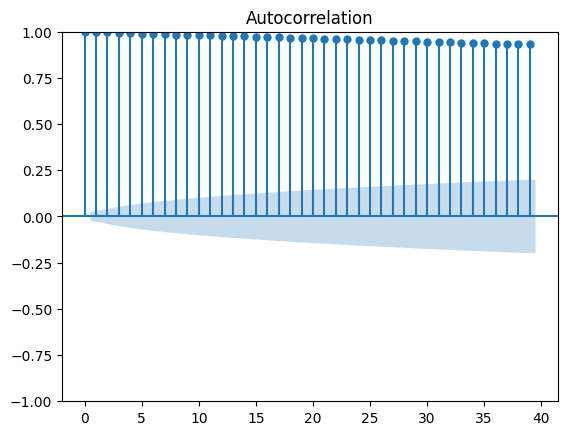

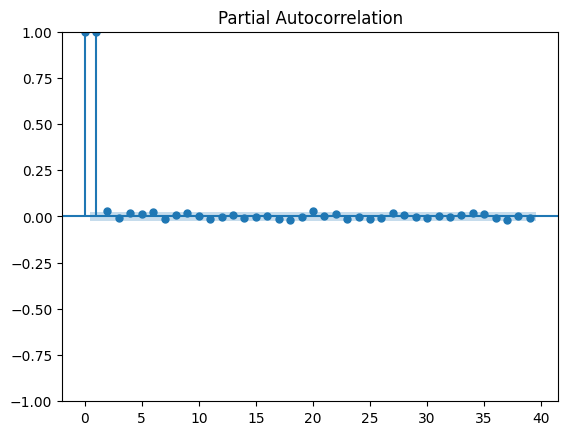

In [33]:
from pyspark.sql import SparkSession
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have a Spark session and your DataFrame 'dataset'
# spark = SparkSession.builder.appName("YourAppName").getOrCreate()

# Convert Spark DataFrame to Pandas DataFrame
dataset_pd = dataset.toPandas()

# Convert 'Date' column to datetime and set it as index
dataset_pd['Date'] = pd.to_datetime(dataset_pd['Date'])

# Ensure the dataset is sorted and has no duplicates
dataset_pd = dataset_pd.sort_values('Date').drop_duplicates(subset='Date')

# Resample to daily frequency if necessary, filling any missing values
dataset_pd.set_index('Date', inplace=True)
dataset_pd = dataset_pd.asfreq('D', method='pad')

# Select the series for modeling, e.g., 'Close' price
series = dataset_pd['Close']

# Plot ACF and PACF for parameter identification
plot_acf(series)
plot_pacf(series)

# Define and fit the ARIMA model (revised parameters based on ACF and PACF analysis)
model = ARIMA(series, order=(1,1,1))  # Change order based on your ACF and PACF analysis
results = model.fit()

# Summarize model results
print(results.summary())

# Make predictions
predictions = results.forecast(steps=5)

# Evaluate the model
# [Your code for evaluation, such as comparing predictions with actual values or calculating error metrics]

In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Assuming dataset_pd is your Pandas DataFrame

# Check and adjust if 'Date' is already the index or named differently
if 'Date' not in dataset_pd.columns:
    # If 'Date' is not a column, it might already be the index or named differently
    # If it's named differently, replace 'Date' with the correct column name
    dataset_pd.index = pd.to_datetime(dataset_pd.index)
else:
    # Convert 'Date' column to datetime and set it as index
    dataset_pd['Date'] = pd.to_datetime(dataset_pd['Date'])
    dataset_pd.set_index('Date', inplace=True)

# Remove duplicates if they exist
dataset_pd = dataset_pd[~dataset_pd.index.duplicated(keep='first')]

# Resample to daily frequency if necessary, filling any missing values
dataset_pd = dataset_pd.asfreq('D', method='pad')
series = dataset_pd['Close']

# Define the p, d, and q parameters to take values between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Iterate over all combinations and fit ARIMA models
model_results = []
for param in pdq:
    try:
        model = ARIMA(series, order=param)
        results = model.fit()
        model_results.append({
            'Order': param,
            'AIC': results.aic,
            'BIC': results.bic
        })
        print(f'ARIMA{param} - AIC:{results.aic} - BIC:{results.bic}')
    except:
        continue

# Convert the results to a DataFrame
results_df = pd.DataFrame(model_results)

# Sort by AIC and BIC
sorted_results_aic = results_df.sort_values(by='AIC')
sorted_results_bic = results_df.sort_values(by='BIC')

# Display the top models based on AIC and BIC
print("\nTop models based on AIC:")
print(sorted_results_aic.head())

print("\nTop models based on BIC:")
print(sorted_results_bic.head())

ARIMA(0, 0, 0) - AIC:108606.44881321483 - BIC:108620.14525735157
ARIMA(0, 0, 1) - AIC:99569.08782412141 - BIC:99589.63249032652
ARIMA(0, 0, 2) - AIC:92396.04869589483 - BIC:92423.44158416832
ARIMA(0, 1, 0) - AIC:69107.00772672688 - BIC:69113.85580514805
ARIMA(0, 1, 1) - AIC:69102.9257270766 - BIC:69116.62188391894
ARIMA(0, 1, 2) - AIC:69103.20105638652 - BIC:69123.74529165002
ARIMA(0, 2, 0) - AIC:74126.65009326978 - BIC:74133.49802802311
ARIMA(0, 2, 1) - AIC:69108.755321027 - BIC:69122.45119053365
ARIMA(0, 2, 2) - AIC:69104.43266673843 - BIC:69124.97647099842
ARIMA(1, 0, 0) - AIC:69122.1961236198 - BIC:69142.74078982491
ARIMA(1, 0, 1) - AIC:69118.45466928263 - BIC:69145.84755755612
ARIMA(1, 0, 2) - AIC:69118.54932783957 - BIC:69152.79043818143
ARIMA(1, 1, 0) - AIC:69102.73938431306 - BIC:69116.4355411554
ARIMA(1, 1, 1) - AIC:69102.80701350047 - BIC:69123.35124876397
ARIMA(1, 1, 2) - AIC:69105.14223943607 - BIC:69132.53455312074
ARIMA(1, 2, 0) - AIC:71911.90900086131 - BIC:71925.6048703

Interpretation of AIC and BIC

    AIC (Akaike Information Criterion):
        AIC is a measure of the relative quality of a statistical model for a given set of data. A lower AIC value suggests a better model.
        It balances the complexity of the model (number of parameters) against how well the model fits the data.

    BIC (Bayesian Information Criterion):
        Similar to AIC, BIC provides a way to compare models. It penalizes more complex models more than AIC does.
        A lower BIC value indicates a better model and is especially useful for models with a larger number of observations.

Analysis of Your Results

    Top Models by AIC:
        The models with the lowest AIC are ARIMA(1, 1, 0), ARIMA(1, 1, 1), ARIMA(0, 1, 1), ARIMA(2, 1, 0), and ARIMA(0, 1, 2).
        These models are preferable in terms of balancing model complexity and fit.

    Top Models by BIC:
        The models with the lowest BIC are ARIMA(0, 1, 0), ARIMA(1, 1, 0), ARIMA(0, 1, 1), ARIMA(0, 2, 1), and ARIMA(1, 1, 1).
        These models are more parsimonious (simpler) and are generally preferred when dealing with larger datasets or when overfitting is a concern.

Recommendations and Next Steps

    Model Selection:
        ARIMA(1, 1, 0) and ARIMA(1, 1, 1) appear in both top AIC and BIC lists, making them strong candidates. These models are likely to provide a good balance between complexity and fit.

        In summary, the results indicate that simpler models (like ARIMA(1, 1, 0)) are performing well compared to more complex ones. This is a good indication that your time series might not require highly complex ARIMA configurations to achieve effective modeling and forecasting.

## LSTM Model

In [35]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Convert the Spark DataFrame to a Pandas DataFrame
dataset_knn_pd = dataset_knn.toPandas()

# Selecting the relevant columns for input features and the target variable 'Close'
feature_columns = ['Close', 'InterestRate', 'BondRate', 'InflationRate']
target_column = 'Close'

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_knn_pd[feature_columns])

# Function to create a dataset with lagged features
def create_dataset(data, look_back=1):
    X, Y = [], []
    target_idx = dataset_knn_pd.columns.get_loc(target_column)
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, target_idx])
    return np.array(X), np.array(Y)

# Prepare the dataset with a specified look back period
look_back = 1
X, Y = create_dataset(scaled_data, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.67)
trainX, trainY = X[:train_size], Y[:train_size]
testX, testY = X[train_size:], Y[train_size:]

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, len(feature_columns)))
testX = np.reshape(testX, (testX.shape[0], look_back, len(feature_columns)))

# Build and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, len(feature_columns))))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(np.column_stack((trainPredict, np.zeros((trainPredict.shape[0], len(feature_columns)-1)))))
testPredict = scaler.inverse_transform(np.column_stack((testPredict, np.zeros((testPredict.shape[0], len(feature_columns)-1)))))
trainY_original = scaler.inverse_transform(np.column_stack((trainY.reshape(-1, 1), np.zeros((trainY.shape[0], len(feature_columns)-1)))))
testY_original = scaler.inverse_transform(np.column_stack((testY.reshape(-1, 1), np.zeros((testY.shape[0], len(feature_columns)-1)))))

# Calculate performance metrics
train_rmse = np.sqrt(mean_squared_error(trainY_original[:, 0], trainPredict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(testY_original[:, 0], testPredict[:, 0]))
test_mape = mean_absolute_percentage_error(testY_original[:, 0], testPredict[:, 0])
test_r2 = r2_score(testY_original[:, 0], testPredict[:, 0])

# Print the performance metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Test MAPE:', test_mape)
print('Test R²:', test_r2)

447/447 [==============================] - 0s 652us/step
Train RMSE: 61.519167670221606
Test RMSE: 58.771331351285085
Test MAPE: 0.008469948700768806
Test R²: 0.9930806801686862


Step 1: Building the Basic LSTM Model

In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def build_lstm_model(input_shape, neurons=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Single output neuron for prediction
    return model

Step 2: Data Preparation for LSTM Model
Now, let's prepare the data for training the LSTM model. This involves normalizing the data and creating lagged features as input for the LSTM. We'll use the 'Close' price and additional indicators from your dataset.

In [37]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

feature_columns = ['Close', 'InterestRate', 'BondRate', 'InflationRate'] 

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_knn_pd[feature_columns])

# Function to create a dataset with lagged features
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :])
        Y.append(data[i + look_back, 0])  #  'Close' is the first column
    return np.array(X), np.array(Y)

# Create the lagged dataset
look_back = 1  # This can be adjusted
X, Y = create_dataset(scaled_data, look_back)

# Split the data into training and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
trainX, trainY = X[:train_size], Y[:train_size]
testX, testY = X[train_size:], Y[train_size:]


Step 3: Basic Model Training

With the  data prepared, the next step is to train the LSTM model with a basic set of hyperparameters. We'll start with a single LSTM layer and a standard configuration, then build from there.

In [38]:
from keras.optimizers import Adam

# Build the LSTM model
input_shape = (look_back, len(feature_columns))
model = build_lstm_model(input_shape, neurons=50, dropout_rate=0.2)  # Basic configuration

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.2, verbose=0)  # Basic training


Step 4: Model Evaluation on Test Data

Great, The model has been trained! Now, let's evaluate its performance on the test data. We'll make predictions and then calculate performance metrics like RMSE (Root Mean Squared Error) to assess how well the model is doing.

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate MAPE
test_mape = mean_absolute_percentage_error(testY_original[:, 0], testPredict[:, 0])

# Calculate R² Score
test_r2 = r2_score(testY_original[:, 0], testPredict[:, 0])

print('Test RMSE:', test_rmse)
print('Test MAPE:', test_mape)
print('Test R²:', test_r2)

Test RMSE: 58.771331351285085
Test MAPE: 0.008469948700768806
Test R²: 0.9930806801686862


Step 5: Hyperparameter Tuning

Now that the evaluated the basic model, the next step is to perform hyperparameter tuning. This involves systematically experimenting with different model configurations to improve performance. We'll focus on tuning key hyperparameters like the number of neurons and learning rate.

Given the iterative nature of this process, it's efficient to create a function that handles model creation, training, and evaluation for different sets of hyperparameters

def hyperparameter_tuning(trainX, trainY, testX, testY, neurons_list, learning_rates, batch_sizes, optimizers):
    results = []
    
    for neurons in neurons_list:
        for optimizer in optimizers:
            for lr in learning_rates:
                for batch_size in batch_sizes:
                    # Build the model
                    model = Sequential()
                    model.add(LSTM(neurons, input_shape=(trainX.shape[1], trainX.shape[2])))
                    model.add(Dropout(0.2))
                    model.add(Dense(1))

                    # Compile the model
                    if optimizer == 'adam':
                        model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
                    elif optimizer == 'nadam':
                        model.compile(optimizer=Nadam(learning_rate=lr), loss='mean_squared_error')
                    elif optimizer == 'adagrad':
                        model.compile(optimizer=Adagrad(learning_rate=lr), loss='mean_squared_error')

                    # Train the model
                    model.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=0)

                    # Evaluate the model
                    testPredict = model.predict(testX)
                    test_rmse = np.sqrt(mean_squared_error(testY, testPredict))
                    test_mape = mean_absolute_percentage_error(testY, testPredict)
                    test_r2 = r2_score(testY, testPredict)

                    # Record the results
                    results.append({
                        'Neurons': neurons,
                        'Optimizer': optimizer,
                        'Learning Rate': lr,
                        'Batch Size': batch_size,
                        'Test RMSE': test_rmse,
                        'Test MAPE': test_mape,
                        'Test R²': test_r2
                    })
    
    return pd.DataFrame(results)

Define the hyperparameters
neurons_list = [10, 30, 50, 100, 150, 200]
learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [4, 8, 16]
optimizers = ['adam', 'nadam', 'adagrad']

train and test datasets
results = hyperparameter_tuning(trainX, trainY, testX, testY, neurons_list, learning_rates, batch_sizes, optimizers)
print(results)

In [40]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import pandas as pd

def hyperparameter_tuning(trainX, trainY, testX, testY, neurons_list, learning_rates, batch_sizes):
    results = []
    for neurons in neurons_list:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                model = Sequential()
                model.add(LSTM(neurons, input_shape=(trainX.shape[1], trainX.shape[2])))
                model.add(Dropout(0.2))
                model.add(Dense(1))
                model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
                model.fit(trainX, trainY, epochs=20, batch_size=batch_size, verbose=0)
                testPredict = model.predict(testX)
                test_rmse = np.sqrt(mean_squared_error(testY, testPredict))
                test_mape = mean_absolute_percentage_error(testY, testPredict)
                test_r2 = r2_score(testY, testPredict)
                results.append({
                    'Neurons': neurons, 'Learning Rate': lr, 'Batch Size': batch_size,
                    'Test RMSE': test_rmse, 'Test MAPE': test_mape, 'Test R²': test_r2
                })
    return pd.DataFrame(results)

# Define the hyperparameters to test
neurons_list = [50, 100]
learning_rates = [0.01, 0.001]
batch_sizes = [32, 64]

results = hyperparameter_tuning(trainX, trainY, testX, testY, neurons_list, learning_rates, batch_sizes)
print(results)


447/447 [==============================] - 1s 913us/step
   Neurons  Learning Rate  Batch Size  Test RMSE  Test MAPE   Test R²
0       50          0.010          32   0.009130   0.010376  0.996215
1       50          0.010          64   0.007038   0.007689  0.997750
2       50          0.001          32   0.005390   0.003686  0.998681
3       50          0.001          64   0.005906   0.004527  0.998416
4      100          0.010          32   0.014325   0.017265  0.990681
5      100          0.010          64   0.008035   0.009774  0.997068
6      100          0.001          32   0.005404   0.004416  0.998674
7      100          0.001          64   0.005544   0.004843  0.998604


    Increase the Range of Neurons: Test a broader range of neuron numbers in your LSTM layers, such as [30, 50, 100, 150]. More neurons can capture more complex patterns but also risk overfitting.

    Experiment with More Learning Rates: Include more varied learning rates, like [0.0001, 0.001, 0.01, 0.1]. This helps in finding the sweet spot where the model learns optimally – not too slow and not missing subtleties.

    Test Additional Batch Sizes: Larger batch sizes like [32, 64, 128] can be tried to see how they impact the model's ability to generalize.

    Increase Epochs for Deeper Training: If computational resources allow, increasing epochs will give the model more time to learn, but keep an eye on overfitting.

In [41]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import pandas as pd

def hyperparameter_tuning(trainX, trainY, testX, testY, neurons_list, learning_rates, batch_sizes, epochs):
    results = []
    
    for neurons in neurons_list:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                # Build the model
                model = Sequential()
                model.add(LSTM(neurons, input_shape=(trainX.shape[1], trainX.shape[2])))
                model.add(Dropout(0.2))
                model.add(Dense(1))
                model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')

                # Train the model
                model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0)

                # Evaluate the model
                testPredict = model.predict(testX)
                test_rmse = np.sqrt(mean_squared_error(testY, testPredict))
                test_mape = mean_absolute_percentage_error(testY, testPredict)
                test_r2 = r2_score(testY, testPredict)

                # Record the results
                results.append({
                    'Neurons': neurons,
                    'Learning Rate': lr,
                    'Batch Size': batch_size,
                    'Epochs': epochs,
                    'Test RMSE': test_rmse,
                    'Test MAPE': test_mape,
                    'Test R²': test_r2
                })
    
    return pd.DataFrame(results)

# Define the new hyperparameters
neurons_list = [30, 50, 100, 150]
learning_rates = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
epochs = 50  # Adjust based on computational capacity

# Run the hyperparameter tuning
expanded_results = hyperparameter_tuning(trainX, trainY, testX, testY, neurons_list, learning_rates, batch_sizes, epochs)
print(expanded_results)

447/447 [==============================] - 1s 991us/step
    Neurons  Learning Rate  Batch Size  Epochs  Test RMSE  Test MAPE   Test R²
0        30         0.0001          32      50   0.006143   0.005210  0.998286
1        30         0.0001          64      50   0.007185   0.006239  0.997655
2        30         0.0001         128      50   0.013991   0.017237  0.991111
3        30         0.0010          32      50   0.007929   0.008187  0.997145
4        30         0.0010          64      50   0.005605   0.004070  0.998573
5        30         0.0010         128      50   0.005380   0.004009  0.998686
6        30         0.0100          32      50   0.011320   0.013853  0.994181
7        30         0.0100          64      50   0.016181   0.015226  0.988110
8        30         0.0100         128      50   0.008668   0.009318  0.996588
9        30         0.1000          32      50   0.032928   0.039974  0.950761
10       30         0.1000          64      50   0.039785   0.033745  0.92

In [42]:
model.save('expanded_results.h5')
from IPython.display import FileLink
FileLink('expanded_results.h5')

/home/fabiopoli/Desktop/expanded_results.h5

## Backtesting

1352/1352 [==============================] - 1s 715us/step


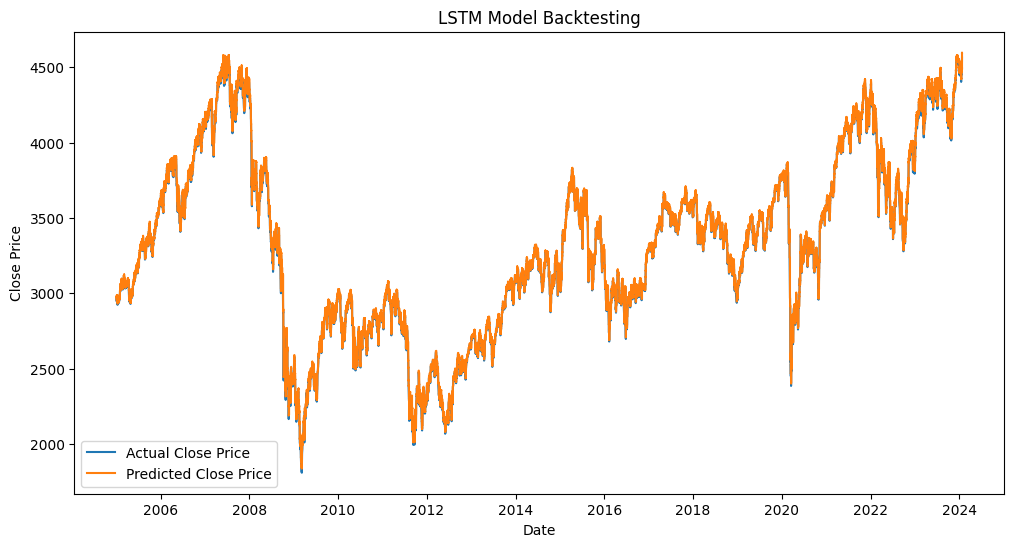

In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Function to create a dataset with lagged features
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Convert Spark DataFrame to Pandas DataFrame
dataset_knn_pd = dataset_knn.toPandas()

# Convert to numeric and handle NaNs
dataset_knn_pd.dropna(inplace=True)
dataset_knn_pd[['Close', 'InterestRate', 'BondRate', 'InflationRate']] = dataset_knn_pd[['Close', 'InterestRate', 'BondRate', 'InflationRate']].apply(pd.to_numeric)

# Normalize the historical data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_knn_pd[['Close', 'InterestRate', 'BondRate', 'InflationRate']])

# Prepare data for backtesting
look_back = 1  # Use the same look_back as your model
X_backtest, Y_backtest = create_dataset(scaled_data, look_back)

# Path to your trained model
model_path = 'expanded_results.h5'

# Load your trained model
model = load_model(model_path)

# Generate predictions
predictions = model.predict(X_backtest)

# Invert predictions to original scale
predictions_inverted = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1] - 1)))))[:, 0]

# Visualization: Plotting Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(dataset_knn_pd['Date'], dataset_knn_pd['Close'], label='Actual Close Price')
plt.plot(dataset_knn_pd['Date'][look_back+1:], predictions_inverted, label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LSTM Model Backtesting')
plt.legend()
plt.show()